In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd

# Set seed for reproducibility
np.random.seed(2301212325)

# Define centers similar to R's matrix
centers = np.array([[-5, -5], [5, 5], [0, 10]])

# Number of samples per class
n_samples_per_class = 100
cluster_std = 5  # Standard deviation for clusters

# Generate 3-class dataset
X, Y = make_blobs(n_samples=n_samples_per_class * 3, centers=centers,
                        cluster_std=cluster_std, random_state=11)

# Convert to DataFrame
df = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'label': Y})

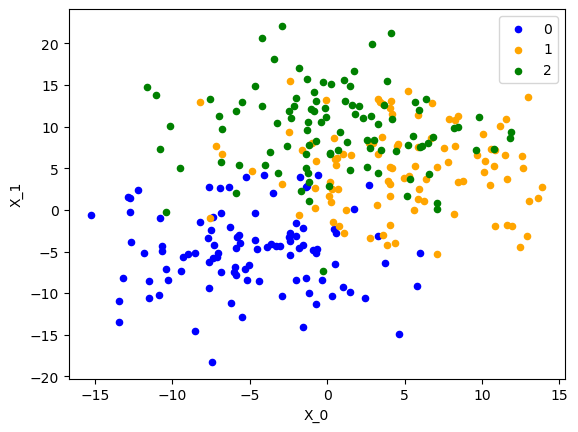

In [2]:
from matplotlib import pyplot as plt
from pandas import DataFrame
df_1 = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange', 2:'green'}
fig, ax = plt.subplots()
grouped = df_1.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()


In [3]:
import numpy as np
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def hx(w, X):
    # w现在是一个k×n的矩阵,k是类别数,n是特征数(包含偏置项)
    X = np.c_[np.ones(X.shape[0]), X]  # 添加偏置项列
    z = np.dot(X, w.T)  # X是m×n, w是k×n, z是m×k
    return softmax(z)

def cost(w, X, Y):
    m = X.shape[0]
    y_pred = hx(w, X)
    # 将Y转换为one-hot编码
    Y_onehot = np.zeros((Y.shape[0], 3))  # 3是类别数
    for i in range(Y.shape[0]):
        Y_onehot[i, Y[i]] = 1
    # Y需要是one-hot编码形式
    return -1/m * np.sum(Y_onehot * np.log(y_pred))

def grad(w, X, Y):
    m = X.shape[0] # 样本数
    X = np.c_[np.ones(X.shape[0]), X]  # 添加偏置项列
    y_pred = hx(w, X)  # y_pred shape: m×k
    # dw shape: k×n, 其中k是类别数,n是特征数(包含偏置项)
    # 将Y转换为one-hot编码
    Y_onehot = np.zeros((Y.shape[0], 3))  # 3是类别数
    for i in range(Y.shape[0]):
        Y_onehot[i, Y[i]] = 1
    dw = 1/m * np.dot((y_pred - Y_onehot).T, X)
    return dw

def descent(w_new, w_prev, lr):
    print(cost(w_prev, X, Y))
    j = 0
    while True:
        w_prev = w_new
        # 整体更新w
        w_new = w_prev - lr * grad(w_prev, X, Y)

        print(cost(w_new, X, Y))

        # 检查收敛
        if np.sum((w_new - w_prev) ** 2) < 1e-6:
            return w_new
        if j > 100:
            return w_new
        j += 1


In [9]:
w = np.ones((3, 3))  # 或者用随机初始化
w = descent(w, w,.0099)

ValueError: shapes (300,5) and (3,3) not aligned: 5 (dim 1) != 3 (dim 0)

C:\Users\froza\AppData\Local\Temp\ipykernel_15380\1885117416.py:15: RuntimeWarning: invalid value encountered in divide
  boundary = -(w[i,1] - w[j,1])*x/(w[i,2] - w[j,2]) - (w[i,0] - w[j,0])/(w[i,2] - w[j,2])
C:\Users\froza\AppData\Local\Temp\ipykernel_15380\1885117416.py:15: RuntimeWarning: invalid value encountered in scalar divide
  boundary = -(w[i,1] - w[j,1])*x/(w[i,2] - w[j,2]) - (w[i,0] - w[j,0])/(w[i,2] - w[j,2])


ValueError: x and y must have same first dimension, but have shapes (35,) and (3, 35)

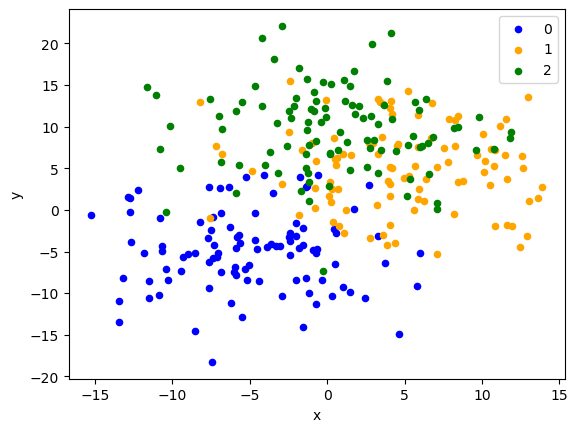

In [5]:
def graph(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    plt.plot(x, y)

def my_formula(x):
    # 对于每两个类别之间的决策边界
    boundaries = []
    for i in range(w.shape[0]-1):
        for j in range(i+1, w.shape[0]):
            # 两个类别之间的决策边界
            # w[i]x - w[j]x = 0
            # (w[i,1] - w[j,1])x + (w[i,2] - w[j,2])y + (w[i,0] - w[j,0]) = 0
            # y = -(w[i,1] - w[j,1])x/(w[i,2] - w[j,2]) - (w[i,0] - w[j,0])/(w[i,2] - w[j,2])
            boundary = -(w[i,1] - w[j,1])*x/(w[i,2] - w[j,2]) - (w[i,0] - w[j,0])/(w[i,2] - w[j,2])
            boundaries.append(boundary)
    return boundaries

from matplotlib import pyplot as plt
from pandas import DataFrame
df_2 = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange', 2:'green'}
fig, ax = plt.subplots()
grouped = df_2.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()